In [1]:
# This file contains the python code for:
# A generator of random graphs;
# Three algorithms for computing a solution to an instance of TSP
# Author: Yuri Faenza, Columbia University - yf2414@columbia.edu

import numpy as np
import networkx as nx
import itertools
import time
import matplotlib.pyplot as plt

### Parameters of figures

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10


In [2]:
### Function that computes the distance in the plane between points (x_1,x_2) and (y_1,y_2)

def compute_distance (x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**(.5)

In [17]:
### Function that generates a graph with n random vertices on the plane and weights given by the euclidean distances between those points 
### Input: n= number of nodes; should_print=0/1 (1 to plot a picture of the instance, 0 otherwise)
### Output: G = graph in NetworkX format, pos= coordinates of the points

def twod_instance(n,should_print):
    
    G=nx.Graph()
    lab=[]
    pos={}


    for i in range(0,n):
        x=np.random.random_sample()
        y=np.random.random_sample()
        G.add_node(i,x=x,y=y)
        pos[i]=(x,y)     # coordinates for drawing
        lab.append(i)       # label for drawing

# if should_print=1, we plot the graph

    if should_print == 1:
        print("Here is the graph with %d nodes we sampled" % n)
        
        nx.draw_networkx_nodes(G,pos,node_size=200)
        nx.draw_networkx_labels(G,pos, node_size=100,label=lab)
            
        plt.show()
    
# assigning euclidean distances as weights

    for i in range(0,n):
        for j in range(i+1,n):
            G.add_edge(i,j, weight=compute_distance(G.node[i]['x'],G.node[i]['y'],G.node[j]['x'],G.node[j]['y']))
    return (G,pos)

Here is the graph with 7 nodes we sampled


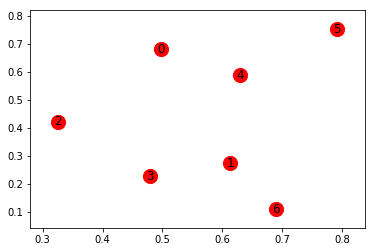

In [18]:
n=7 # set number of nodes in the instance
(Gi,pos)=twod_instance(n,1)

In [19]:
### Function implementing the brute force approach to TSP
### Prints the current best tour found and the final optimal tour
### Input: G= Graph (in networkX format); pos=2-dimensional coordinates of the input; should_print=0/1 (1 to plot a picture of the final tour, 0 otherwise)
### Output: none


def run_brute_force_TSP(G,pos,should_print):

    start_time = time.time()
    
    n=nx.number_of_nodes(G)
    best_weight=n*(2**(1.2))
    best_sequence=0

    print(" **** Brute force enumeration ***")
    print("")
    print("")

    print ("Here are the best tours found so far via brute force enumeration:")

    for seq in itertools.permutations(range(n)):
        weight=0
        for j in range(n-1):
            weight=weight+G.edges[seq[j],seq[j+1]]['weight']
        weight=weight+G.edges[seq[n-1],seq[0]]['weight']
        if (weight <= best_weight):
            best_sequence=seq
            best_weight=weight
            print(best_weight)

    stop_time=time.time() - start_time
    
# if should_print=1, we plot the tour


    if should_print == 1:
        
        G_final=nx.Graph()
        for i in range(n-1):
            G_final.add_edge(best_sequence[i],best_sequence[i+1])
        G_final.add_edge(best_sequence[0],best_sequence[n-1])
        nx.draw_networkx(G_final,pos,node_size=200)
        plt.show()

    
    print("I've found the best tour: it is %s and has length %f." % (best_sequence, best_weight))
    print("Running time of the complete enumeration algorithm: %s seconds" % (time.time() - start_time)) 
    print("")

 **** Brute force enumeration ***


Here are the best tours found so far via brute force enumeration:
2.872312232741739
2.827439683160747
2.2531704967971957
2.164186331327329
1.971212710742892
1.8957197017897174
1.8282958140317043
1.8282958140317043
1.828295814031704


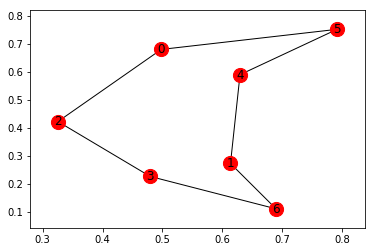

I've found the best tour: it is (3, 2, 0, 5, 4, 1, 6) and has length 1.828296.
Running time of the complete enumeration algorithm: 0.17992711067199707 seconds



In [20]:
# run brute force TSP on the graph generated above
run_brute_force_TSP(Gi,pos,1) 

In [22]:
### Function implementing the Greedy algorithm for TSP 
### Prints the tour it finds, and its picture
### Input: G= Graph (in networkX format); pos=2-dimensional coordinates of the input; should_print=0/1 (1 to plot a picture of the tour found, 0 otherwise)
### Output: none

def run_greedy_TSP(G,pos,should_print):   

    start_time = time.time()
    
    n=nx.number_of_nodes(G)
    tour=[0]
    nr_cities=0
    length_tour=0


    while nr_cities<n-1:
        min_weight=999999
        candidate=-1
        for i in range(0,n):
            if (i not in tour):
                if G.edges[tour[nr_cities],i]['weight']< min_weight:
                    min_weight=G.edges[tour[nr_cities],i]['weight']
                    candidate=i
        tour.append(candidate)
        nr_cities=nr_cities+1
        length_tour=length_tour+min_weight

# don't forget we have to come back to the first node
    
    length_tour=length_tour+G.edges[0,tour[n-1]]['weight']
    
    final_time=time.time() - start_time

# if should_print=1, we plot the tour


    if should_print == 1:
        print(" **** Greedy Algorithm ***")
        print("")
        print("")
        G_final=nx.Graph()
        for i in range(n-1):
            G_final.add_edge(tour[i],tour[i+1])
        G_final.add_edge(tour[0],tour[n-1])

            
        nx.draw_networkx_labels(G_final,pos,node_size=100,label=range(n))
        nx.draw_networkx(G_final,pos,node_size=200)
        plt.show()

# uncomment this if you want the tour and its cost to be output
            
    print ("The greedy tour is %s and its total length is %f" % (tour,length_tour))
    print("Running time of the greedy algorithm: %s seconds" % final_time) 
    print("")

    
    return length_tour # returns the total weight of the tour

    



 **** Greedy Algorithm ***




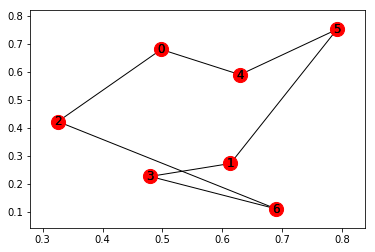

The greedy tour is [0, 4, 5, 1, 3, 6, 2] and its total length is 2.072280
Running time of the greedy algorithm: 7.295608520507812e-05 seconds



2.0722802906957725

In [23]:
run_greedy_TSP(Gi,pos,1)

In [26]:
### Function implementing the MST-based algorithm for TSP 
### Prints the tour it finds, and the intermediate graphs generated by the algorithm
### Input: G= Graph (in networkX format); pos=2-dimensional coordinates of the input; should_print=0/1 (1 to plot a picture of the tour found, 0 otherwise)
### Output: none
def run_Spanning_tree_TSP (G,pos,should_print):
    
    start_time = time.time()
    
    T=nx.minimum_spanning_tree(G,'weight')    
    
    T1=nx.Graph()
    for u,v,x in T.edges(data=True):
        T1.add_edge(u,v,weight=x)
    
    MG=nx.MultiGraph()
    MG.add_edges_from(T.edges())
    MG.add_edges_from(T1.edges())

# Construct an eulerian circuit of C

    circuit=list(nx.eulerian_circuit(MG))
    multitour=[item[0] for item in circuit]

# Remove nodes where we passed twice

    tour=[]
    for i in multitour:
        if i not in tour:
            tour.append(i)

# We have obtained the tour, now we can stop the clock
            
    total_time=time.time() - start_time


    if should_print == 1:
#
# If should_print=1, plot all intermediate graphs produced, and the final tour
#

# We start with the spanning tree

        
        print(" **** Minimum Spanning Tree-based Algorithm ***")
        print("")
        print("")
        print("Here is  the minimum spanning tree:")

        nx.draw_networkx(T,pos,node_size=200)
    
        plt.show()

# Here is the Eulerian circuit

# we first assign to edges labels following the order in which they are traversed by the circuit

        traversed_order={}
        for i in circuit:
            x=max(i[0],i[1])
            y=min(i[0],i[1])
            traversed_order[(x,y)]=[]
     
        position=1
        for i in circuit:
            x=max(i[0],i[1])
            y=min(i[0],i[1])
            traversed_order[(x,y)].append(position)
            position=position+1
    
        
# then we plot the circuit       
 
        print("Here is the order in which edges are traversed:")

    
        nx.draw_networkx(MG,pos,node_size=200)
        nx.draw_networkx_edge_labels(MG,pos,edge_labels=traversed_order)
        plt.show()
    
# Finally, we shortcut       

    
        print("The tour, after shortcutting:")

        G_final=nx.Graph()
        for i in range(n-1):
            G_final.add_edge(tour[i],tour[i+1])
        G_final.add_edge(tour[n-1],tour[0])
        
        nx.draw_networkx(G_final,pos,node_size=200)
        nx.draw_networkx_labels(G_final,pos,node_size=50,label=range(n))
        plt.show()
        
    

# Computes the cost of the tour    

    total_weight=0
    for i in range(len(tour)-1):
        total_weight=total_weight+G.edges[tour[i],tour[i+1]]['weight']
    total_weight=total_weight+G.edges[tour[0],tour[len(tour)-1]]['weight']

    
    print("The tour found with the MST algorithm is %s and its total length is %f" % (tour,total_weight))
    print("Running time of the MST algorithm: %s seconds" % total_time) 
    print("")
    
    return total_weight # returns the total weight of the tour
    

[(0, 2), (2, 3), (3, 1), (1, 6), (6, 1), (1, 3), (3, 2), (2, 0), (0, 4), (4, 5), (5, 4), (4, 0)]
 **** Minimum Spanning Tree-based Algorithm ***


Here is  the minimum spanning tree:


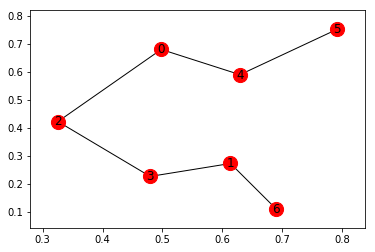

Here is the order in which edges are traversed:


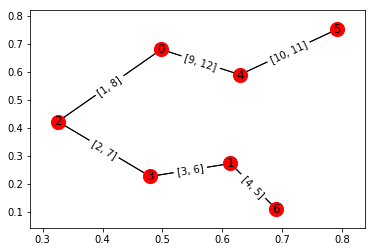

The tour, after shortcutting:


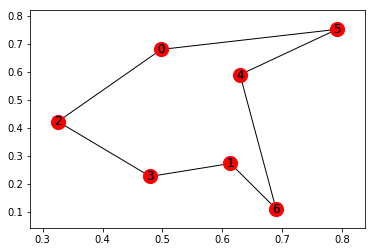

The tour found with the MST algorithm is [0, 2, 3, 1, 6, 4, 5] and its total length is 1.895720
Running time of the MST algorithm: 0.0009157657623291016 seconds



1.8957197017897174

In [27]:
run_Spanning_tree_TSP(Gi,pos,1)